<a href="https://colab.research.google.com/github/eunjaelim/python/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **제2강 머신러닝으로 분류하기(1)**

**머신러닝 따라하기**

**라이브러리 추가**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

**데이터셋 준비**

In [ ]:
iris = load_iris()

iris_data = iris.data 
iris_label = iris.target

**데이터셋 탐색**

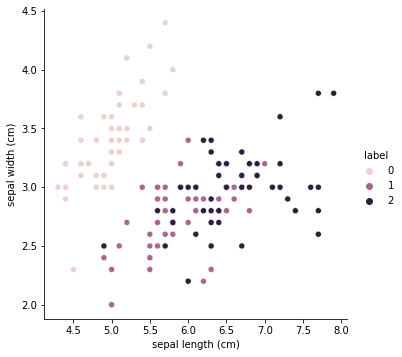

In [ ]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) 
iris_df ['label'] = iris.target 

sns.pairplot(iris_df, x_vars=["sepal length (cm)"],  
             y_vars=["sepal width (cm)"], hue="label", height=5) 

**머신러닝 수행**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2) 

dt_clf = DecisionTreeClassifier() 
knn_clf = KNeighborsClassifier() 

dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

y1_pred = dt_clf.predict(X_test) 
y2_pred = knn_clf.predict(X_test) 

print('DecisionTree 예측정확도 : {0:.4f}'.format(accuracy_score(y_test, y1_pred))) 
print('k-NN 예측정확도 : {0: .4f}'.format(accuracy_score(y_test, y2_pred))) 

DecisionTree 예측정확도 : 0.9000
k-NN 예측정확도 :  0.9333


# **k-NN 알고리즘 활용 실습**

**라이브러리 import**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv") 

In [3]:
df.head() 

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.Pos.value_counts() 

SG    50
C     50
Name: Pos, dtype: int64

**데이터 시각화**

**스틸, 2점슛 데이터 시각화**

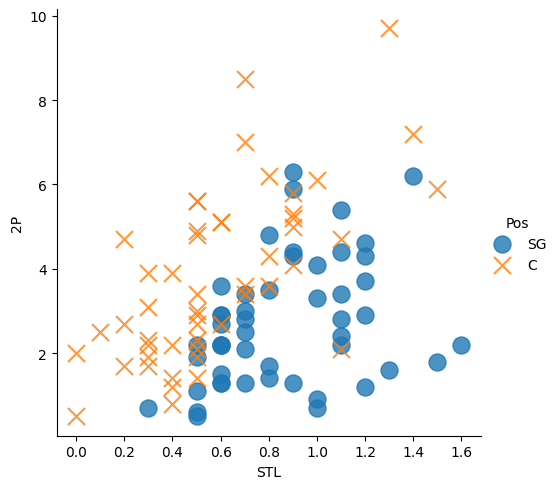

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='STL', y='2P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos") 

**블로킹, 3점슛 데이터 시각화**

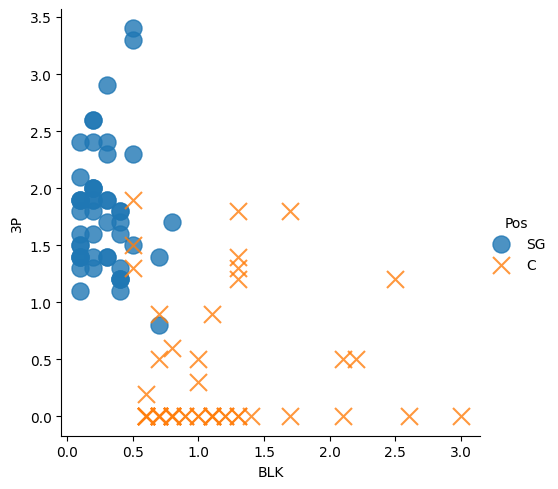

In [7]:
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos") 

**리바운드, 3점슛 데이터 시각화**

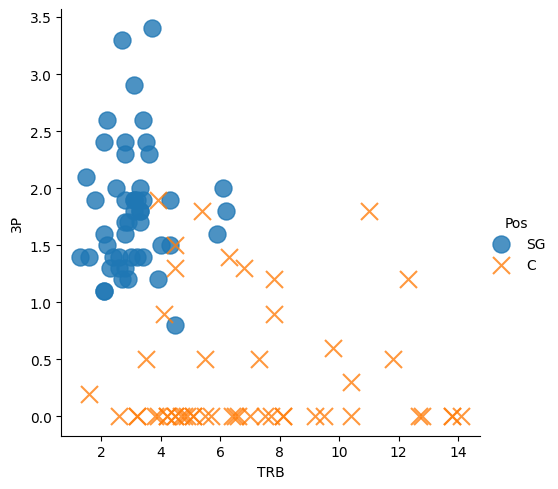

In [8]:
sns.lmplot(x='TRB', y='3P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos") 

**데이터 다듬기**

In [9]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True) 
df.head() 

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


---------------------------------------------------------

**데이터 나누기**

In [11]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size=0.2) 

print(train.shape[0])
print(test.shape[0])

80
20


**라이브러리 import**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

np.random.seed(5)

**최적의 kNN 파라미터 찾기**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2 
k_list = [] 
for i in range(3, max_k_range, 2): 
    k_list.append(i) 

In [13]:
cross_validation_scores = [] 
x_train = train[['3P', 'BLK' , 'TRB']] 
y_train = train[['Pos']] 

In [15]:
for k in k_list:  
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), 
                             cv=10, scoring='accuracy') 
    cross_validation_scores.append(scores.mean()) 

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

**k의 변화에 따른 정확도 시각화**

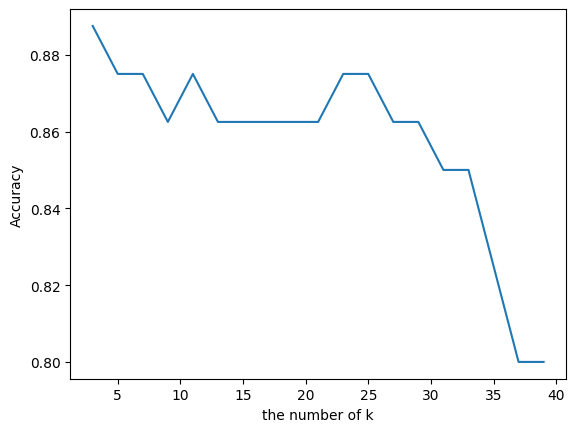

The best number of k : 3


In [16]:
plt.plot(k_list, cross_validation_scores) 
plt.xlabel('the number of k') 
plt.ylabel('Accuracy') 
plt.show() 
cvs = cross_validation_scores 
k = k_list[cvs.index(max(cross_validation_scores))] 
print("The best number of k : " + str(k) ) 

**k-NN 모델 테스트**

In [17]:
from sklearn.metrics import accuracy_score 

knn = KNeighborsClassifier(n_neighbors=k) 

x_train = train[['3P', 'BLK', 'TRB']] 
y_train = train[['Pos']] 

knn.fit(x_train, y_train.values.ravel()) 

x_test = test[['3P', 'BLK', 'TRB']] 
y_test = test[['Pos']] 
pred = knn.predict(x_test) 
print("accuracy : "+  
          str(accuracy_score(y_test.values.ravel(), pred)) ) 

comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison.head(10) 

accuracy : 0.95


,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
